In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import networkx as nx
import seaborn as sns

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/mba.csv", encoding='ISO-8859-1') # or encoding='cp1252'
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
def sum_info(df):
    print("Number of rows: {0}, number of columns: {1}".format(df.shape[0], df.shape[1]))
    info = pd.DataFrame(df.dtypes, columns=['dtypes'])
    info = info.reset_index()
    info['Name'] = info['index']
    info = info[['Name', 'dtypes']]
    info['Missing'] = df.isnull().sum().values
    info['Missing_%'] = info['Missing']/df.shape[0]*100
    info['Uniques'] = df.nunique().values
    info['First Row'] = df.loc[0].values
    info['Last Row'] = df.loc[df.shape[0]-1].values

    return info

In [ ]:
sum_info(df)

Number of rows: 541909, number of columns: 8


,Name,dtypes,Missing,Missing_%,Uniques,First Row,Last Row
0,InvoiceNo,object,0,0.000000,25900,536365,581587
1,StockCode,object,0,0.000000,4070,85123A,22138
2,Description,object,1454,0.268311,4223,WHITE HANGING HEART T-LIGHT HOLDER,BAKING SET 9 PIECE RETROSPOT
3,Quantity,int64,0,0.000000,722,6,3
4,InvoiceDate,object,0,0.000000,23260,12/1/2010 8:26,12/9/2011 12:50
5,UnitPrice,float64,0,0.000000,1630,2.55,4.95
6,CustomerID,float64,135080,24.926694,4372,17850.0,12680.0
7,Country,object,0,0.000000,38,United Kingdom,France


In [ ]:
df.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,541909.00,541909.00,406829.00
mean,9.55,4.61,15287.69
std,218.08,96.76,1713.60
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13953.00
50%,3.00,2.08,15152.00
75%,10.00,4.13,16791.00
max,80995.00,38970.00,18287.00


In [ ]:
df['Country'].value_counts().head()

,count
Country,
United Kingdom,495478
Germany,9495
France,8557
EIRE,8196
Spain,2533


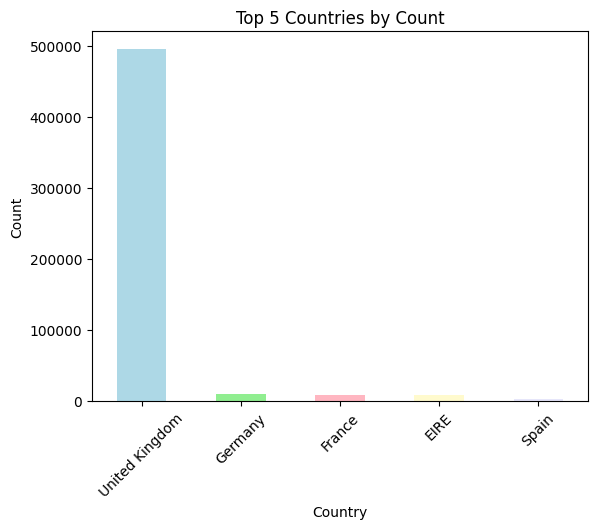

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


top_countries = df['Country'].value_counts().head()

colors = ['#add8e6', '#90ee90', '#ffb6c1', '#fffacd', '#e6e6fa']

top_countries.plot(kind='bar', color=colors)
plt.title('Top 5 Countries by Count')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



In [ ]:
find_nans = lambda df: df[df.isnull().any(axis=1)]
(find_nans(df).head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [ ]:
data = df[df['Quantity'] > 0]
data = df.dropna(subset=['CustomerID'])
print(data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [ ]:
basket = data.groupby(['InvoiceNo', 'StockCode'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

def encode_units(x):
    return 1 if x > 0 else 0

basket = basket.applymap(encode_units)

print(basket.head())


<ipython-input-13-bc989484ff0d>:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(encode_units)


StockCode  10002  10080  10120  10123C  10124A  10124G  10125  10133  10135  \
InvoiceNo                                                                     
536365         0      0      0       0       0       0      0      0      0   
536366         0      0      0       0       0       0      0      0      0   
536367         0      0      0       0       0       0      0      0      0   
536368         0      0      0       0       0       0      0      0      0   
536369         0      0      0       0       0       0      0      0      0   

StockCode  11001  ...  90214Y  90214Z  BANK CHARGES  C2  CRUK  D  DOT  M  \
InvoiceNo         ...                                                      
536365         0  ...       0       0             0   0     0  0    0  0   
536366         0  ...       0       0             0   0     0  0    0  0   
536367         0  ...       0       0             0   0     0  0    0  0   
536368         0  ...       0       0             0   0     0  0  

In [ ]:
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = fpgrowth(basket, min_support=0.02, use_colnames=True)

print(frequent_itemsets)


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


      support         itemsets
0    0.089139         (85123A)
1    0.061965          (84879)
2    0.031140          (21754)
3    0.025011          (21755)
4    0.023930          (48187)
..        ...              ...
168  0.020685   (20725, 20728)
169  0.024380   (22697, 22699)
170  0.020730   (22698, 22697)
171  0.021091  (23203, 85099B)
172  0.020865   (23301, 23300)

[173 rows x 2 columns]


In [ ]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

print(rules)


   antecedents consequents  antecedent support  consequent support   support  \
0      (22726)     (22727)            0.035557            0.039522  0.023885   
1      (22727)     (22726)            0.039522            0.035557  0.023885   
2      (82482)    (82494L)            0.039477            0.036548  0.021091   
3     (82494L)     (82482)            0.036548            0.039477  0.021091   
4      (21733)    (85123A)            0.030599            0.089139  0.020595   
5      (22386)    (85099B)            0.039252            0.072105  0.024606   
6      (22910)     (22086)            0.031411            0.044164  0.020324   
7      (22384)     (20725)            0.041956            0.058089  0.023569   
8      (22697)     (22699)            0.031140            0.035286  0.024380   
9      (22699)     (22697)            0.035286            0.031140  0.024380   
10     (22698)     (22697)            0.025056            0.031140  0.020730   
11     (22697)     (22698)            0.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


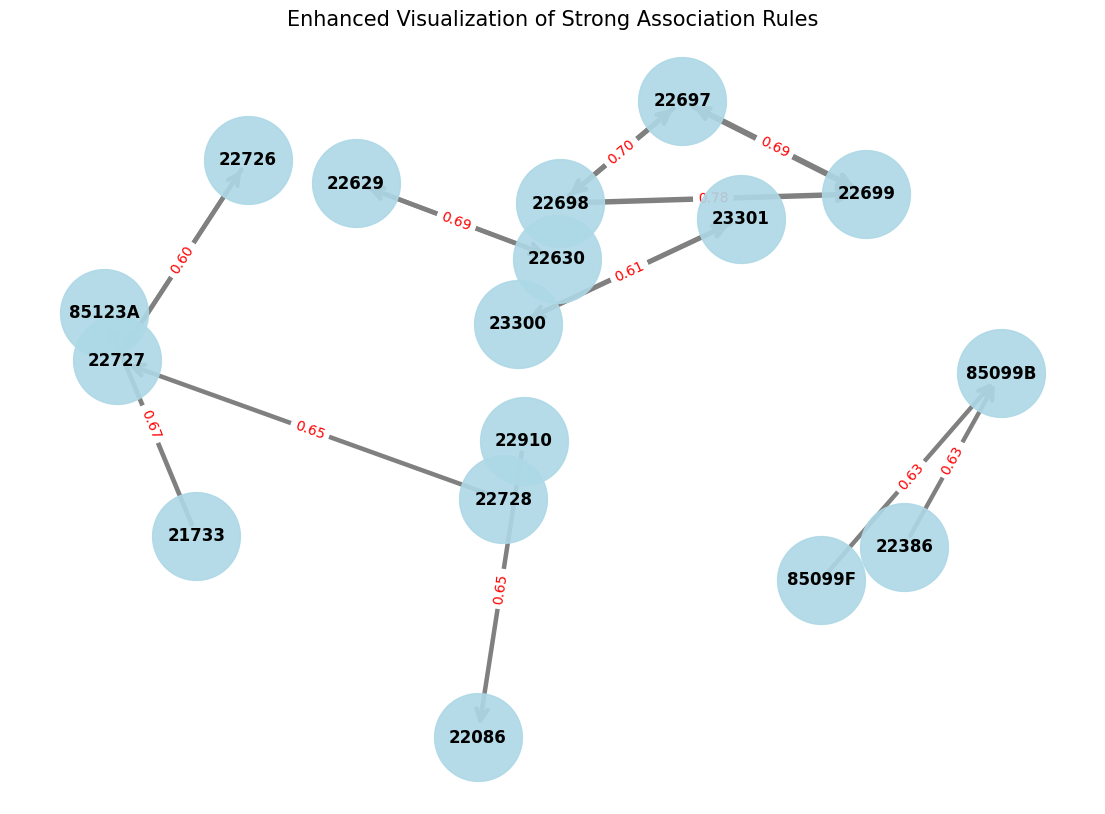

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

good_rules = rules[(rules['confidence'] > 0.6) & (rules['lift'] > 1.2)]

G = nx.DiGraph()

for idx, row in good_rules.iterrows():
    G.add_edge(tuple(row['antecedents'])[0], tuple(row['consequents'])[0], weight=row['confidence'])

plt.figure(figsize=(14, 10))

pos = nx.spring_layout(G, k=1.5, iterations=100)

nx.draw_networkx_nodes(G, pos, node_size=4000, node_color='lightblue', node_shape='o', alpha=0.9)

edges = nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20, edge_color='gray', width=[G[u][v]['weight'] * 5 for u, v in G.edges()])

nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', font_color='black')

edge_labels = nx.get_edge_attributes(G, 'weight')
edge_labels = {k: f'{v:.2f}' for k, v in edge_labels.items()}  # تحديد عدد المنازل العشرية
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=10)

plt.title('Enhanced Visualization of Strong Association Rules', size=15)
plt.axis('off')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


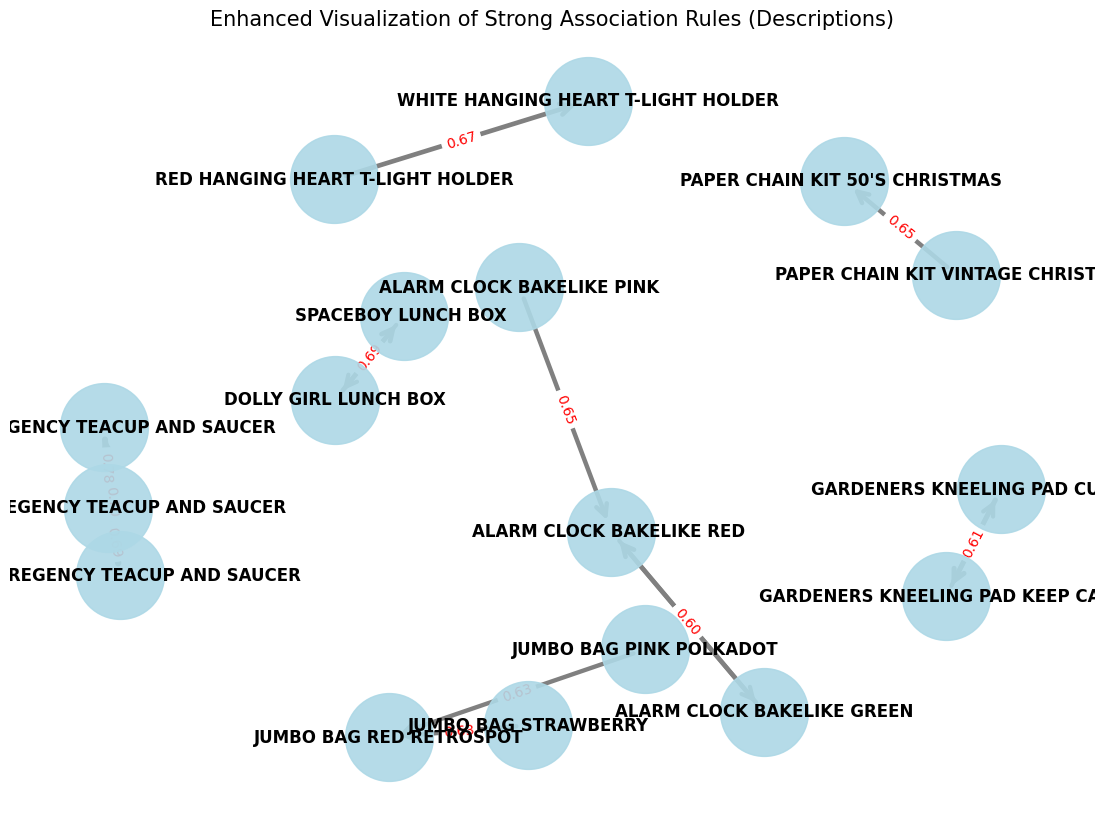

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

good_rules = rules[(rules['confidence'] > 0.6) & (rules['lift'] > 1.2)]

G = nx.DiGraph()

for idx, row in good_rules.iterrows():
    antecedent = tuple(row['antecedents'])[0]
    consequent = tuple(row['consequents'])[0]

    antecedent_description = data[data['StockCode'] == antecedent]['Description'].values[0]
    consequent_description = data[data['StockCode'] == consequent]['Description'].values[0]

    G.add_edge(antecedent_description, consequent_description, weight=row['confidence'])

plt.figure(figsize=(14, 10))

pos = nx.spring_layout(G, k=1.5, iterations=100)

nx.draw_networkx_nodes(G, pos, node_size=4000, node_color='lightblue', node_shape='o', alpha=0.9)

edges = nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20, edge_color='gray', width=[G[u][v]['weight'] * 5 for u, v in G.edges()])

nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', font_color='black')

edge_labels = nx.get_edge_attributes(G, 'weight')
edge_labels = {k: f'{v:.2f}' for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=10)

plt.title('Enhanced Visualization of Strong Association Rules (Descriptions)', size=15)
plt.axis('off')
plt.show()

In [ ]:
import pandas as pd

good_rules = rules[(rules['confidence'] > 0.6) & (rules['lift'] > 1.2)]

relationship_data = []

for idx, row in good_rules.iterrows():
    antecedent = tuple(row['antecedents'])[0]
    consequent = tuple(row['consequents'])[0]

    antecedent_description = data[data['StockCode'] == antecedent]['Description'].values[0]
    consequent_description = data[data['StockCode'] == consequent]['Description'].values[0]

    relationship_data.append({
        'Antecedent Description': antecedent_description,
        'Consequent Description': consequent_description,
        'Confidence': row['confidence'],
        'Lift': row['lift']
    })

relationship_df = pd.DataFrame(relationship_data)

print(relationship_df)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                Antecedent Description              Consequent Description  \
0            ALARM CLOCK BAKELIKE RED           ALARM CLOCK BAKELIKE GREEN   
1           ALARM CLOCK BAKELIKE GREEN           ALARM CLOCK BAKELIKE RED    
2     RED HANGING HEART T-LIGHT HOLDER  WHITE HANGING HEART T-LIGHT HOLDER   
3              JUMBO BAG PINK POLKADOT             JUMBO BAG RED RETROSPOT   
4    PAPER CHAIN KIT VINTAGE CHRISTMAS     PAPER CHAIN KIT 50'S CHRISTMAS    
5     ROSES REGENCY TEACUP AND SAUCER      GREEN REGENCY TEACUP AND SAUCER   
6      GREEN REGENCY TEACUP AND SAUCER    ROSES REGENCY TEACUP AND SAUCER    
7       PINK REGENCY TEACUP AND SAUCER     GREEN REGENCY TEACUP AND SAUCER   
8      GREEN REGENCY TEACUP AND SAUCER      PINK REGENCY TEACUP AND SAUCER   
9   GARDENERS KNEELING PAD CUP OF TEA    GARDENERS KNEELING PAD KEEP CALM    
10   GARDENERS KNEELING PAD KEEP CALM   GARDENERS KNEELING PAD CUP OF TEA    

    Confidence       Lift  
0     0.604333  16.996386  
1     0